In [145]:
import matplotlib.pyplot as plt
import numpy as np

In [146]:
def f(x):
    return (np.arctan(np.log(x**2 + 1) + 1))**2

In [147]:
a = -5.
b = 5.
N = 100

In [148]:
x = np.linspace(a, b, N+1)
y = f(x)

In [149]:
string_1 = []
string_2 = []
string_3 = []
i = 0

In [150]:
with open('first_o(h).txt', 'r') as file:
    for item in enumerate(file):
        string_1.append(item[1])

In [151]:
with open('first_o(h2).txt', 'r') as file:
    for item in enumerate(file):
        string_2.append(item[1])

In [152]:
with open('second_o(h2).txt', 'r') as file:
    for item in enumerate(file):
        string_3.append(item[1])

In [153]:
for k in range(N):
    string_1[k] = string_1[k].split('/')

In [154]:
for k in range(N):
    string_2[k] = string_2[k].split('/')

In [155]:
for k in range(N):
    string_3[k] = string_3[k].split('/')

In [156]:
x_fir = np.zeros(N)
y_fir = np.zeros(N)

x_firp = np.zeros(N)
y_firp = np.zeros(N)

x_sec = np.zeros(N)
y_sec = np.zeros(N)

In [157]:
for k in range(N):
    x_fir[k] = string_1[k][0]
    y_fir[k] = string_1[k][1]
    
for k in range(N):
    x_firp[k] = string_2[k][0]
    y_firp[k] = string_2[k][1]

for k in range(N):
    x_sec[k] = string_3[k][0]
    y_sec[k] = string_3[k][1]

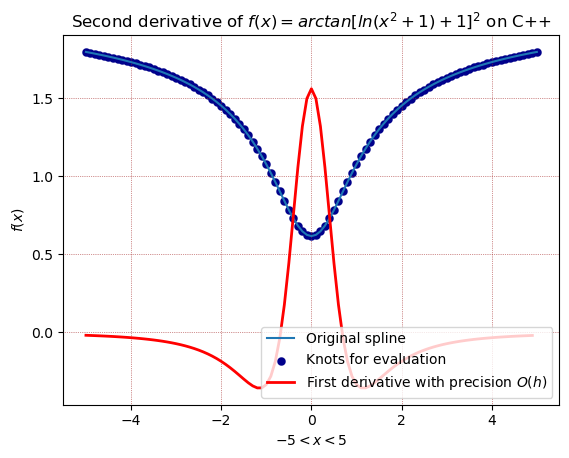

In [159]:
plt.plot(x, y, label = 'Original spline')
plt.scatter(x, y, label = 'Knots for evaluation', lw = 0.1, color = 'darkblue')
plt.plot(x_sec, y_sec, lw = 2.0, color = 'red', label = 'First derivative with precision $O(h)$')
plt.title('Second derivative of $f(x) = arctan[ln(x^2 + 1) + 1]^2$ on C++')
plt.xlabel('$-5 < x < 5$')
plt.ylabel('$f(x)$')
plt.grid(color = 'brown', ls = ":", lw = 0.5)
plt.legend(loc = 4)

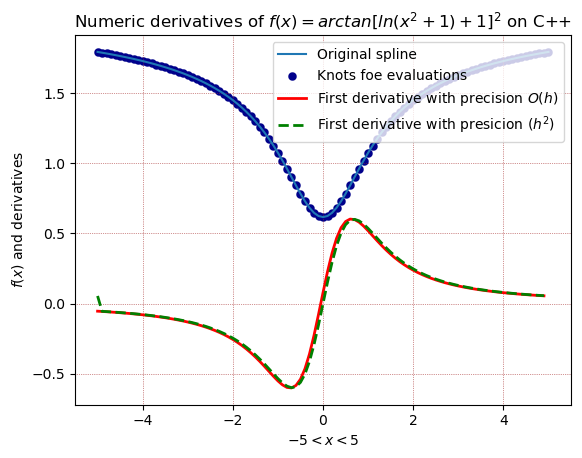

In [173]:
plt.plot(x, y, label = 'Original spline')
plt.scatter(x, y, label = 'Knots foe evaluations', lw = 0.1, color = 'darkblue')
plt.plot(x_fir, y_fir, lw = 2.0, color = 'red', label = 'First derivative with precision $O(h)$')
plt.plot(x_firp, y_firp, lw = 2.0, ls = '--', color = 'green', label = 'First derivative with presicion $(h^2)$')
plt.title('Numeric derivatives of $f(x) = arctan[ln(x^2 + 1) + 1]^2$ on C++')
plt.xlabel('$-5 < x < 5$')
plt.ylabel('$f(x)$ and derivatives')
plt.grid(color = 'brown', ls = ":", lw = 0.5)
#plt.text(12, 0, "Computational complexity is $O(N^3)$", fontsize =12)
plt.legend(loc = 1)

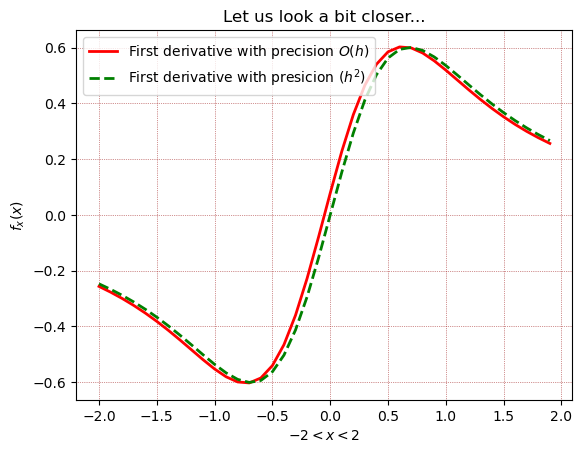

In [174]:
plt.plot(x_fir[30:70], y_fir[30:70], lw = 2.0, color = 'red', label = 'First derivative with precision $O(h)$')
plt.plot(x_firp[30:70], y_firp[30:70], lw = 2.0, ls = '--', color = 'green', label = 'First derivative with presicion $(h^2)$')
plt.title('Let us look a bit closer...')
plt.xlabel('$-2 < x < 2$')
plt.ylabel('$f_x(x)$')
plt.grid(color = 'brown', ls = ":", lw = 0.5)
plt.legend(loc = 2)


In [160]:
def computate_right(x, i):
    return (f(x[i + 1]) - f(x[i]))/(x[i + 1] - x[i])

In [161]:
def computate_left(x, i):
    return computate_right(x, i - 1);

In [162]:
def computate_centre(x, i):
    return (f(x[i + 1]) - f(x[i - 1]))/(x[i + 1] - x[i - 1])

In [132]:
def computate_right_precisely(x):
    return (-3 * f(x[0]) - f(x[2]) + 4 * f(x[1])) / (x[2] - x[0])

In [133]:
def computate_left_precisely(x, N):
    return (3 * f(x[N]) + f(x[N - 2]) - 4 * f(x[N - 1])) / (x[N] - x[N - 2])

In [134]:
def computate_centre_second(x,i):
    return(f(x[i + 1]) - 2 * f(x[i]) + f(x[i - 1])) / ((x[i + 1] - x[i]) * (x[i + 1] - x[i]))


In [135]:
def computate_left_second(x, N):
    return (-1 * f(x[N - 3]) + 4 * f(x[N - 2]) - 5 * f(x[N - 1]) + 2 * f(x[N])) / ((x[N] - x[N - 1]) * (x[N] - x[N - 1]))

In [136]:
def computate_right_second(x):
    return (2 * f(x[0]) - 5 * f(x[1]) + 4 * f(x[2]) - f(x[3])) / ((x[1] - x[0]) * (x[1] - x[0]))

In [193]:
def computate_centre_second_precisely(x, i):
    return (-f(x[i + 2]) + 16*f(x[i + 1]) - 30*f(x[i]) +16*f(x[i-1]) - f(x[i - 2]))/(12*(x[i + 1] - x[i])*(x[i + 1] - x[i]))

In [194]:

y_x = [computate_right(x, i) for i in range(0,N)]
y_x.append(computate_left(x, N))

In [195]:
len(y_x)


101

In [196]:
y_x_pres = np.zeros(N + 1)
for i in range(1, N):
    y_x_pres[i] = computate_centre(x, i)
y_x_pres[0] = computate_right_precisely(x)
y_x_pres[N] = computate_left_precisely(x, N)

In [197]:
len(y_x_pres)

101

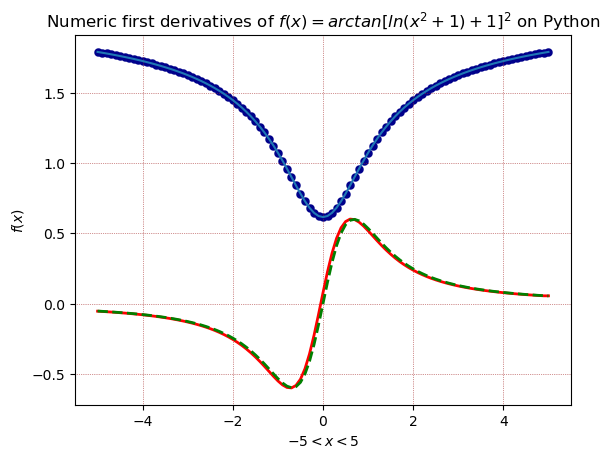

In [198]:
plt.plot(x, y, label = 'Original spline')
plt.scatter(x, y, label = 'Knots foe evaluations', lw = 0.1, color = 'darkblue')
plt.plot(x, y_x, lw = 2.0, color = 'red', label = 'First derivative with precision $O(h)$')
plt.plot(x, y_x_pres, lw = 2.0, ls = '--', color = 'green', label = 'First derivative with presicion $(h**2)$')
plt.title('Numeric first derivatives of $f(x) = arctan[ln(x^2 + 1) + 1]^2$ on Python')
plt.xlabel('$-5 < x < 5$')
plt.ylabel('$f(x)$')
plt.grid(color = 'brown', ls = ":", lw = 0.5)

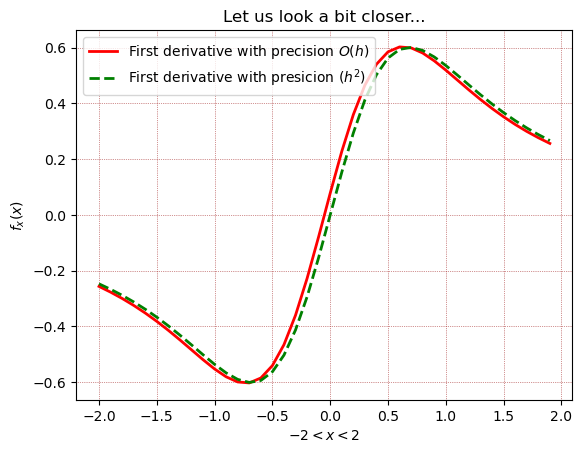

In [199]:
plt.plot(x[30:70], y_x[30:70], lw = 2.0, color = 'red', label = 'First derivative with precision $O(h)$')
plt.plot(x[30:70], y_x_pres[30:70], lw = 2.0, ls = '--', color = 'green', label = 'First derivative with presicion $(h^2)$')
plt.title('Let us look a bit closer...')
plt.xlabel('$-2 < x < 2$')
plt.ylabel('$f_x(x)$')
plt.grid(color = 'brown', ls = ":", lw = 0.5)
plt.legend(loc = 2)


In [200]:
y_xx = [computate_centre_second(x, i) for i in range(1,N)]
y_xx.insert(0, computate_right_second(x))
y_xx.insert(N, computate_left_second(x, N))


In [201]:
len(y_xx)

101

In [202]:
y_xx_pres = [computate_centre_second_precisely(x, i) for i in range(2,N - 1)]
y_xx_pres.insert(0, 0)
y_xx_pres.insert(1, 0)
y_xx_pres.insert(N, 0)
y_xx_pres.insert(N-1, 0)

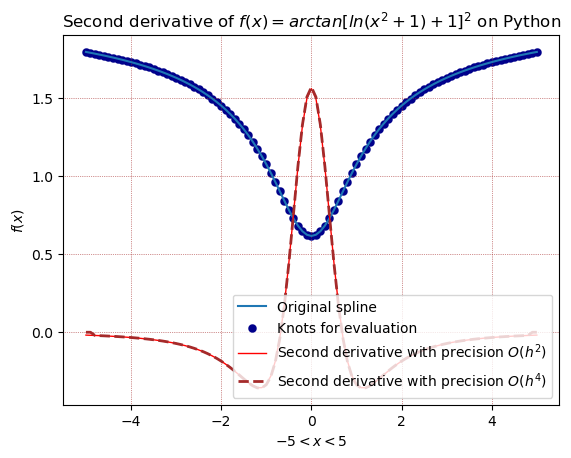

In [205]:
plt.plot(x, y, label = 'Original spline')
plt.scatter(x, y, label = 'Knots for evaluation', lw = 0.1, color = 'darkblue')
plt.plot(x, y_xx, lw = 1.0, color = 'red', label = 'Second derivative with precision $O(h^2)$')
plt.plot(x, y_xx_pres, lw = 2.0, color = 'brown', ls = '--', label = 'Second derivative with precision $O(h^4)$')
plt.title('Second derivative of $f(x) = arctan[ln(x^2 + 1) + 1]^2$ on Python')
plt.xlabel('$-5 < x < 5$')
plt.ylabel('$f(x)$')
plt.grid(color = 'brown', ls = ":", lw = 0.5)
plt.legend(loc = 4)

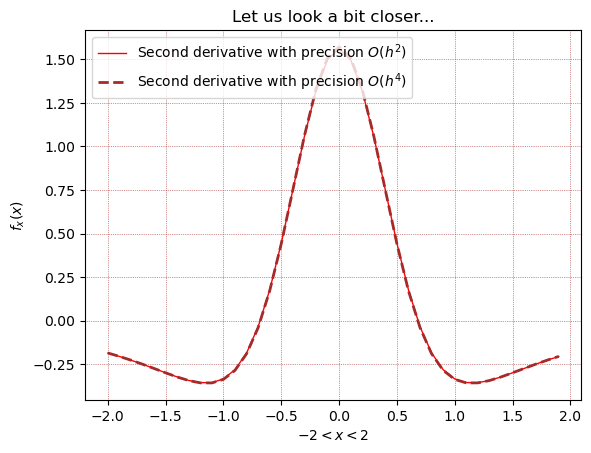

In [207]:
plt.plot(x[30:70], y_xx[30:70], lw = 1.0, color = 'red', label = 'Second derivative with precision $O(h^2)$')
plt.plot(x[30:70], y_xx_pres[30:70], lw = 2.0, color = 'brown', ls = '--', label = 'Second derivative with precision $O(h^4)$')
plt.xlabel('$-2 < x < 2$')
plt.ylabel('$f_x(x)$')
plt.title('Let us look a bit closer...')
plt.grid(color = 'brown', ls = ":", lw = 0.5)
plt.legend(loc = 2)

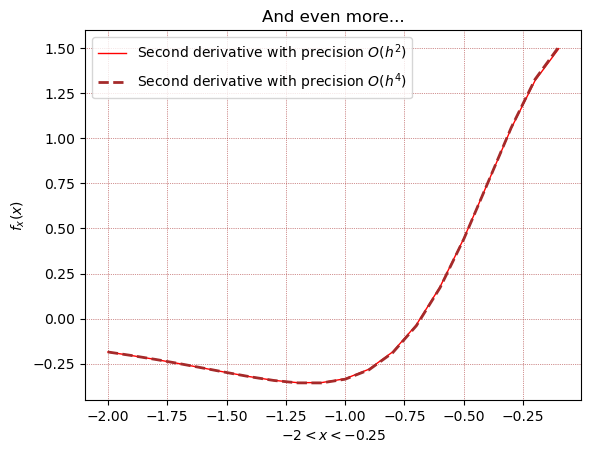

In [210]:
plt.plot(x[30:50], y_xx[30:50], lw = 1.0, color = 'red', label = 'Second derivative with precision $O(h^2)$')
plt.plot(x[30:50], y_xx_pres[30:50], lw = 2.0, color = 'brown', ls = '--', label = 'Second derivative with precision $O(h^4)$')
plt.xlabel('$-2 < x < -0.25$')
plt.ylabel('$f_x(x)$')
plt.title('And even more...')
plt.grid(color = 'brown', ls = ":", lw = 0.5)
plt.legend(loc = 2)